### Detecção por Inteligência Artificial de Barras Quebradas em Rotores de Motores de Indução Trifásicos.

Objetivo do projeto - 
Baseado em conceitos de Data Science e IA desenvolver uma ferramenta de Manutenção Preditiva dedicada a diagnosticar barras quebradas em rotores de motores de indução trifásicos.

Link para o dataset:  https://ieee-dataport.org/open-access/experimental-database-detecting-and-diagnosing-rotor-broken-bar-three-phase-induction


Introdução:

O conjunto de dados contém sinais elétricos e mecânicos de experimentos em motores de indução trifásicos. Os ensaios experimentais foram realizados para diferentes cargas mecânicas no eixo do motor de indução e diferentes severidades de defeitos de barra quebrada no rotor do motor, incluindo dados referentes ao rotor sem defeitos. Dez repetições foram realizadas para cada condição experimental.
 
A bancada experimental consiste em um motor de indução trifásico acoplado a uma máquina de corrente contínua, que funciona como um gerador simulando o torque de carga, conectado por um eixo contendo uma chave de torque rotativa.

- Motor de Indução: 1cv, 220V/380V, 3.02A/1.75A, 4 pólos, 60 Hz, com o torque nominal de 4.1 Nm e uma velocidade nominal de 1715 rpm. O rotor é do tipo gaiola de esquilo composto por 34 barras.

- Torque de carga: é ajustado variando a tensão do enrolamento de campo do gerador de corrente contínua. Um variador de tensão monofásico com um retificador de ponte completa filtrado é usado para esse propósito. Um motor de indução foi testado em 12,5, 25, 37,5, 50, 62,5, 75, 87,5 e 100% da carga total.

- Barra do rotor quebrada: para simular a falha no rotor do motor de indução trifásico, foi necessário perfurar o rotor. As barras de rotor de ruptura são geralmente adjacentes à primeira barra de rotor, 4 rotores foram testados, o primeiro com uma barra de quebra, o segundo com duas barras quebradas adjacentes e assim por diante o rotor contendo quatro barras quebradas adjacentes.

Condição de monitoramento:

Todos os sinais foram amostrados ao mesmo tempo por 18 segundos para cada condição de carregamento e dez repetições foram realizadas do transiente para o estado estacionário do motor de indução.

- Sinais mecânicos: foram utilizados cinco acelerômetros axiais simultaneamente, com sensibilidade de 10 mV/mm/s, faixa de frequência de 5 a 2.000 Hz e caixa de aço inoxidável, permitindo medições de vibração tanto na extremidade motriz (DE) quanto na extremidade não motriz (NDE) laterais do motor, axial ou radialmente, nas direções horizontal ou vertical.

- Sinais elétricos: as correntes foram medidas por sondas de corrente alternada, que correspondem a medidores de precisão, com capacidade de até 50ARMS, com tensão de saída de 10 mV/A, correspondente ao modelo Yokogawa 96033. As tensões foram medidas diretamente nos terminais de indução usando pontos de tensão do osciloscópio e do fabricante Yokogawa.

Visão geral do dataset:

-         Tensão trifásica

-         Corrente trifásica

-         Cinco sinais de vibração

Referências:

O banco de dados foi adquirido no Laboratório de Automação Inteligente de Processos e Sistemas e no Laboratório de Controle Inteligente de Máquinas Elétricas da Escola de Engenharia de São Carlos da Universidade de São Paulo (USP), Brasil.
            
Aline Elly Treml, Rogério Andrade Flauzino, Marcelo Suetake, Narco Afonso Ravazzoli Maciejewski, September 15, 2020, "Experimental database for detecting and diagnosing rotor broken bar in a three-phase induction motor.", IEEE Dataport, doi: https://dx.doi.org/10.21227/fmnm-bn95.

### Segunda etapa - Explorando as variáveis

In [1]:
# Importando as bibliotecas
import pandas as pd

In [2]:
torque=[5,10,15,20,25,30,35,40]

In [4]:
normal0 = pd.read_csv('arquivos_csv_normal/normal_torque05_0.csv', index_col=0)

In [12]:
normal0

,Ia,Ib,Ic,Trigger,Va,Vb,Vc,Vib_acpe,Vib_acpi,Vib_axial,Vib_base,Vib_carc
0,0.016667,-0.004167,0.012500,6.219788,3.341667,3.341667,3.333333,-0.021362,-0.070190,0.018311,0.262451,-0.003052
1,0.008333,0.000000,0.012500,6.219482,3.350000,3.350000,3.358333,-0.021362,-0.045776,0.015259,0.192261,0.015259
2,0.000000,0.000000,0.008333,6.219177,3.300000,3.316667,3.266667,-0.021362,-0.021362,0.012207,0.109863,0.027466
3,-0.008333,0.004167,0.000000,6.219788,3.400000,3.358333,3.400000,-0.030518,0.000000,0.012207,0.012207,0.039673
4,0.004167,-0.008333,0.004167,6.219177,3.275000,3.250000,3.258333,-0.039673,0.015259,0.006104,-0.100708,0.054932
...,...,...,...,...,...,...,...,...,...,...,...,...
1000995,-1.166667,1.266667,-0.008333,NaN,175.491700,-42.450000,-128.983300,NaN,NaN,NaN,NaN,NaN
1000996,-1.162500,1.270833,-0.025000,NaN,175.283300,-41.316670,-130.025000,NaN,NaN,NaN,NaN,NaN
1000997,-1.166667,1.270833,-0.033333,NaN,175.175000,-40.125000,-131.091700,NaN,NaN,NaN,NaN,NaN
1000998,-1.158333,1.270833,-0.058333,NaN,175.183300,-38.758330,-131.950000,NaN,NaN,NaN,NaN,NaN


In [18]:
# Verificando a proporção de valores nulos para uma das colunas de corrente elétrica
# (normal0.Ia.isnull().sum() / normal0.Ia.count())*100
(normal0.Ia.isnull().sum() / normal0.Ia.isnull().count())*100

0.0

In [20]:
# Verificando a proporção de valores nulos para uma das colunas de vibração
# (normal0.Vib_carc.isnull().sum() /normal0.Vib_carc.count())*100
(normal0.Vib_carc.isnull().sum() /normal0.Vib_carc.isnull().count())*100

84.66493506493507

Após verificar a ausência de mais de 84.6% dos valores de vibração e nenhum valor faltante para corrente, evidenciou-se a necessidade de continuar o estudo a partir dos dados de corrente elétrica.

<AxesSubplot:>

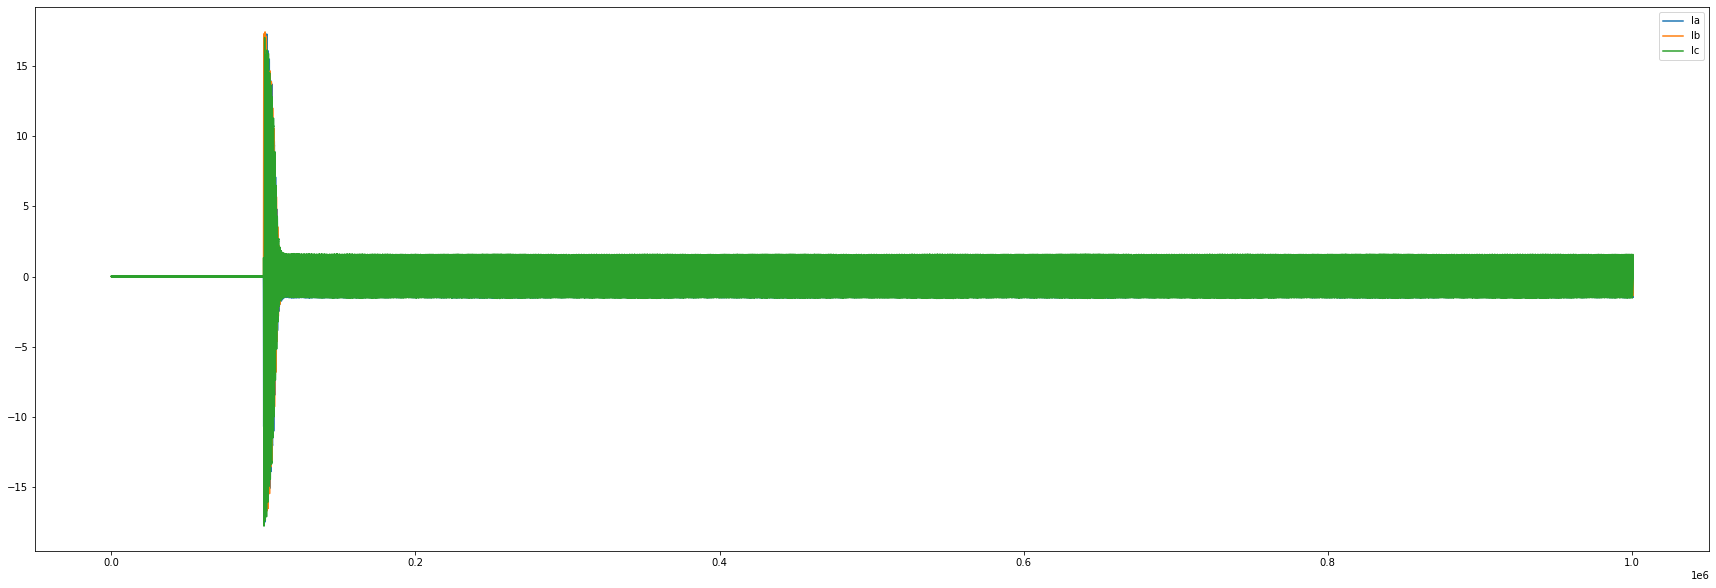

In [91]:
# Plotando as variáveis de interesse;
# Observa-se que existe um periodo transitório (partida do motor) que necessita ser retirado do dataset, 
# pois a análise irá se basear no regime permanente.
normal0[['Ia','Ib','Ic']].plot(figsize=(30,10))

In [85]:
# Quantidade total de pontos no dataset
normal0.Ia.count() 

1001000

In [86]:
# Verificando em quais pontos ocorrem o cruzamento da variável por zero, assim, determina-se em um ciclo de onda
# (considerando 60Hz) quantos pontos são amostrados por ciclo.
# O valor de corte na forma de onda inicia-se em 101000 devido a necessidade de retirada do período transitório
# no dataset.
count=0
for i in normal1['Ia'][101000:102000]:
    count+=1
    if i <0.1 and i > -0.1:
        print("Valor da variável principal",i)
        print("Ponto no qual ocorre a passagem por zero:", count)

Valor da variável principal -0.08333333
Ponto no qual ocorre a passagem por zero: 122
Valor da variável principal -0.0125
Ponto no qual ocorre a passagem por zero: 123
Valor da variável principal 0.06666667
Ponto no qual ocorre a passagem por zero: 124
Valor da variável principal 0.07083333
Ponto no qual ocorre a passagem por zero: 540
Valor da variável principal -0.0125
Ponto no qual ocorre a passagem por zero: 541
Valor da variável principal -0.09166667
Ponto no qual ocorre a passagem por zero: 542
Valor da variável principal -0.08333333
Ponto no qual ocorre a passagem por zero: 950
Valor da variável principal -0.025
Ponto no qual ocorre a passagem por zero: 951
Valor da variável principal 0.05416667
Ponto no qual ocorre a passagem por zero: 952


<AxesSubplot:>

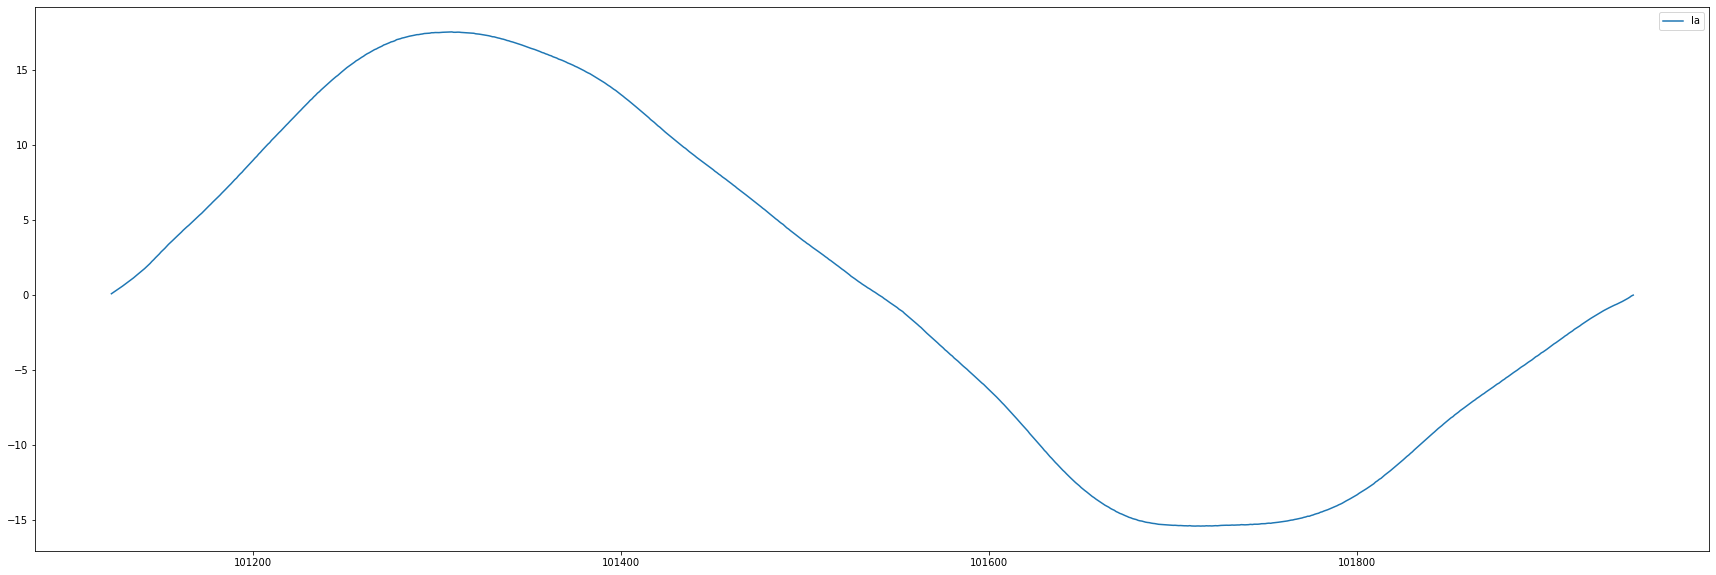

In [89]:
# Considera-se os pontos inicial e final: 101000 + 123 e 10100+951
normal1[['Ia']][101123:101951].plot(figsize=(30,10))

In [115]:
# Observa-se que existem 828 pontos para cada ciclo de onda
ciclo = 101951 - 101123
ciclo

828

In [116]:
# A taxa de amostragem empregada consiste na quantidade de pontos encontrados anteriormente multiplicado pela 
# frequência de rede elétrica (60Hz), assim, temos:
Amostragem = ciclo*60 #Amostragem de 49,68kHz
Amostragem

49680

In [117]:
# O tempo total do dataset. Este tempo considera ainda a existencia do perído transitório que necessita
# ser retirado.
normal0.Ia.count() / Amostragem

20.148953301127214

<AxesSubplot:>

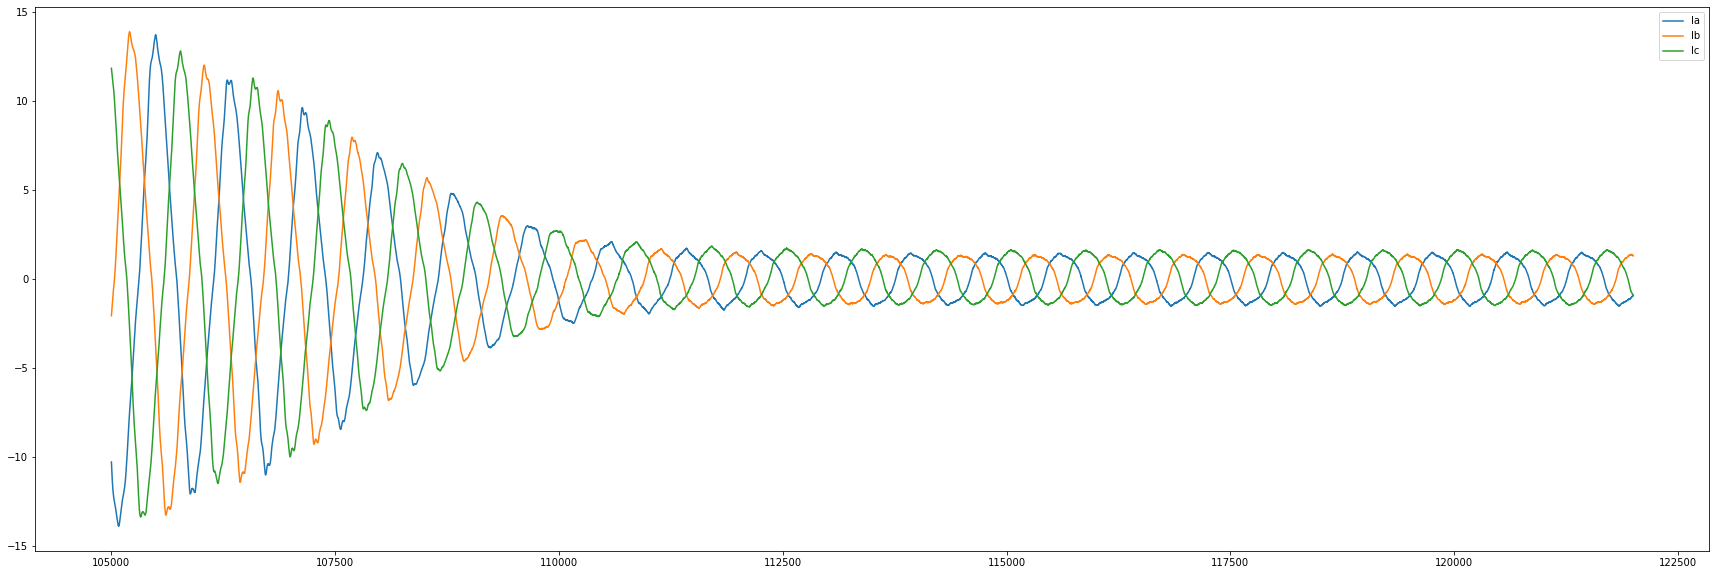

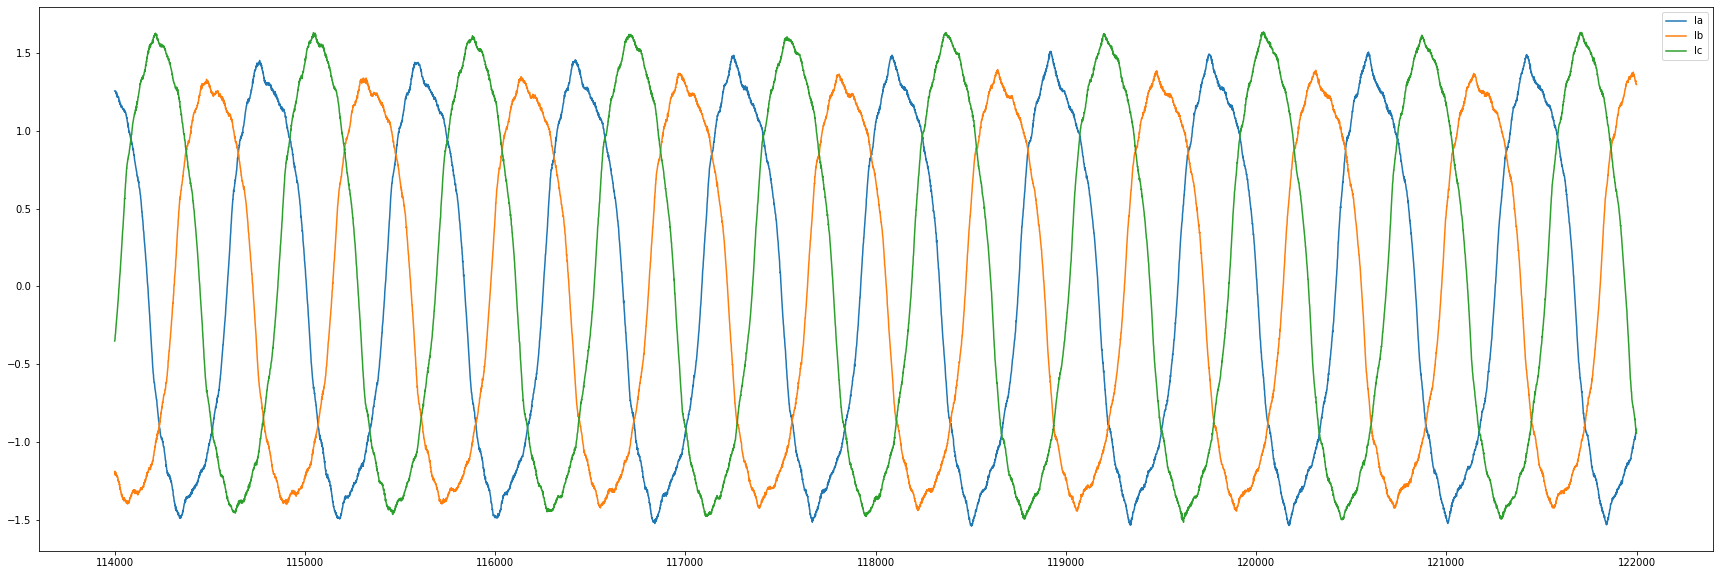

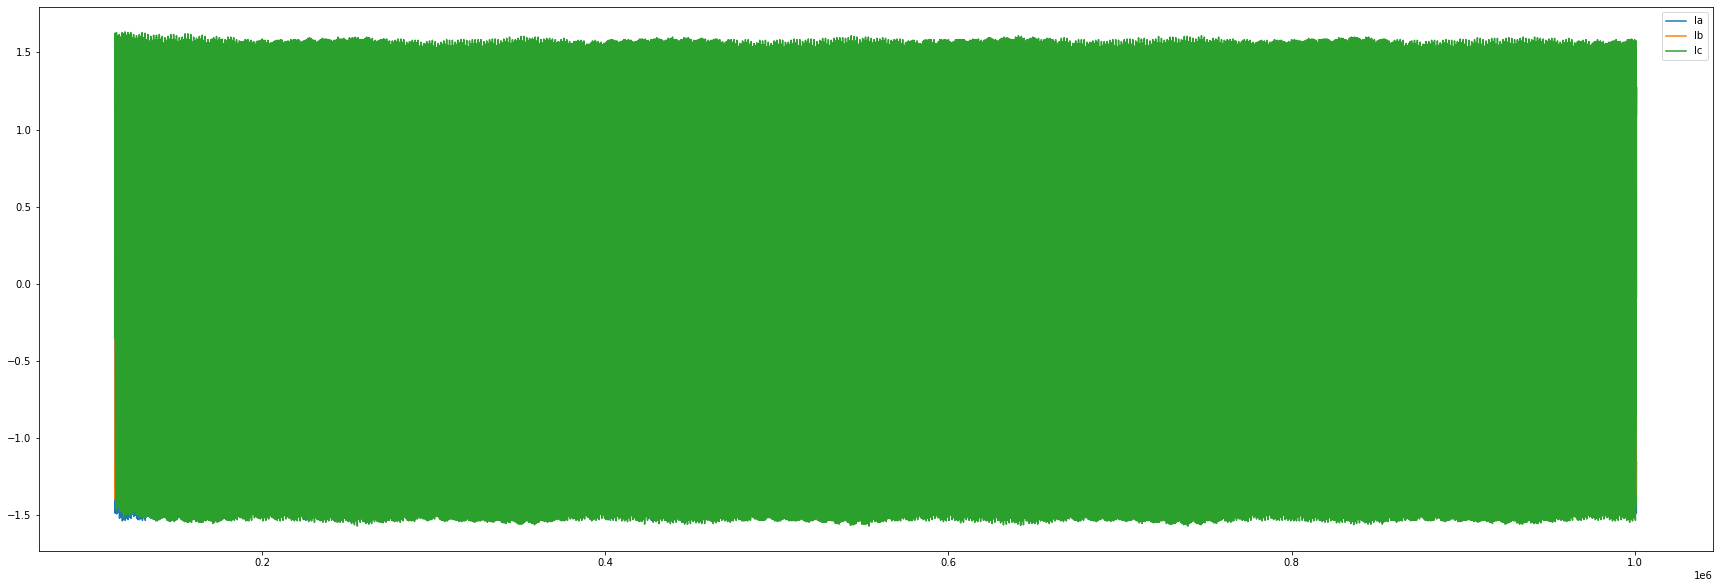

In [97]:
# Os gráficos abaixo mostram o ajuste do corte realizado manualmente. Define-se hipoteticamente que o regime 
#permanente esteja completamente estabelecido a partir do ponto 114000 como mostrado abaixo
normal0[['Ia','Ib','Ic']][105000:122000].plot(figsize=(30,10)) # 1º plot
normal0[['Ia','Ib','Ic']][114000:122000].plot(figsize=(30,10)) # 2º plot
normal0[['Ia','Ib','Ic']][114000:].plot(figsize=(30,10)) # 3º plot

In [112]:
#Recalculando o tamanho total do dataset após o corte
normal0[114000:].Ia.count()

887000

In [113]:
#Tempo total de amostragem dos dados de corrente após o corte (segundos)
normal0[114000:].Ia.count() / Amostragem

17.85426731078905

## Iniciando os estudos sobre a FFT

In [124]:
# O cálculo da resolução da FFT é dado por:
# fa = amostragem
# Na que é a quantidade de dados em uma janela. Considerando 10 ciclos de onda temos:
R = Amostragem/(ciclo*10)
R

6.0

In [125]:
# tempo de cada janela
t = (1/60)*10
t

0.16666666666666666

Para continuar veja o jupyter 2_FFT...